In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

In [2]:
model = keras.models.load_model('models/classifier',compile=False)

In [3]:
color_list=[[204,78,134],
            [165,227,230],
            [255,255,85],
            [255,200,100],
            [0,0,0],
            [255,255,255]]
crops_list=['sugar beet',
            'barley',
            'maiz',
            'summer oat',
            'other',
            'background']
def predict_output(array,width=512,height=512):
  predict = np.empty((width,height,3))
  for i in range(width):
    for j in range(height):
      try:
        col_num = np.argmax(array[i,j])
        predict[i,j] = color_list[col_num]
      except:
        predict[i,j] = [255,255,255]
  return predict.astype('int')

2019_186.png


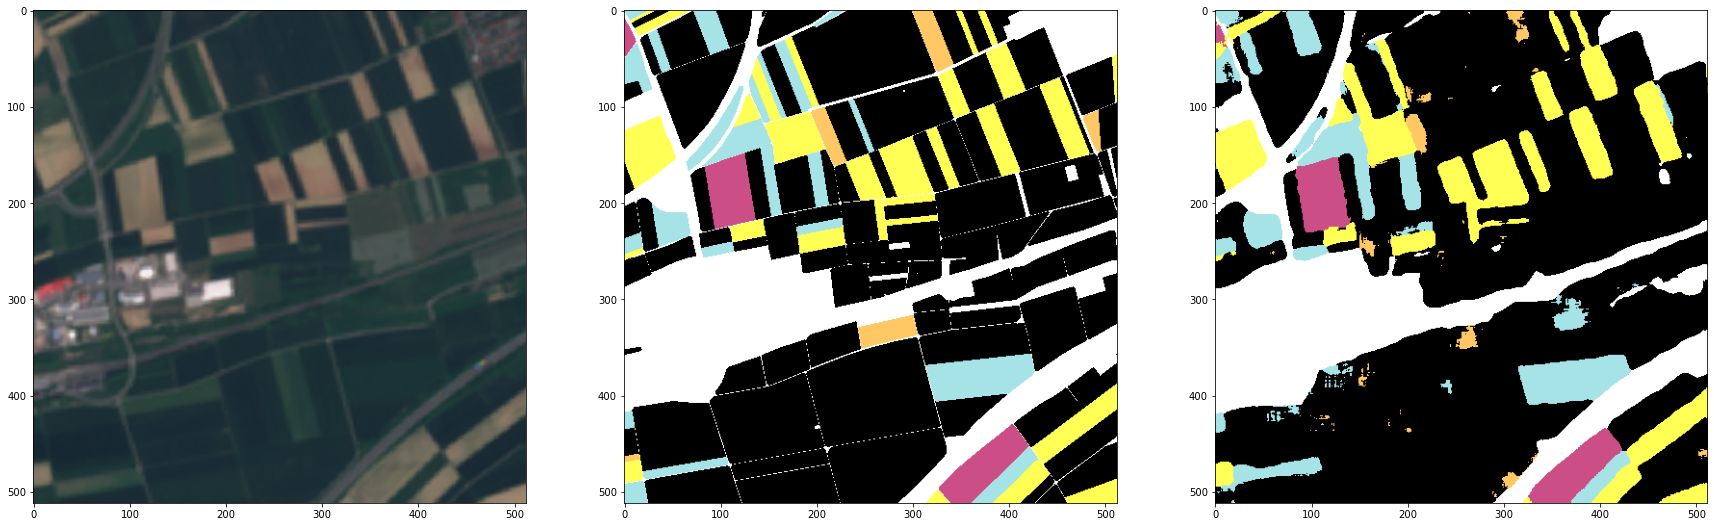

In [10]:
'''
    Run this cell for a new image each time
'''

import random
pred_id = random.sample(os.listdir('images/validation/agriframes'),1)

agripredict = keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(
                  'images/validation/agriframes/'+pred_id[0],
                                                  target_size=(512,512)))/255
natpredict = keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(
                  'images/validation/natframes/'+pred_id[0],
                                                  target_size=(512,512)))/255

      
agripredict = agripredict[np.newaxis,...]
natpredict = natpredict[np.newaxis,...]

prediction = model.predict([agripredict,natpredict])

from PIL import Image
predict_pic = predict_output(prediction[0])
print(pred_id[0])
plt.figure(figsize=(30,10))
plt.subplot(131).imshow(Image.open('images/validation/natframes/'+pred_id[0]))
plt.subplot(132).imshow(predict_output(np.load('images/validation/one-hot-masks/'+pred_id[0][:-3]+'npy')))
plt.subplot(133).imshow(predict_pic)